# HW4 Part2 Fuel Efficiency
Created by: Canal Li and Brian Wu

Last updated by: Buz 2024-04-30

In [ ]:
import os
import sys
import subprocess
import shutil
import importlib
from pathlib import Path

ORG = "BEE3600-2025"
ASSETS_REPO = "BEE-3600-Assets"
ASSETS_URL = f"https://github.com/{ORG}/{ASSETS_REPO}"
ASSETS_DIR = f"/content/{ASSETS_REPO}"

if not os.path.exists(ASSETS_DIR):
    subprocess.run(["git", "clone", "--depth", "1", ASSETS_URL, ASSETS_DIR], check=True)

if ASSETS_DIR not in sys.path:
    sys.path.insert(0, ASSETS_DIR)

try:
    import rewiredcarbon
    print("rewiredcarbon is importable.")
except ModuleNotFoundError as e:
    raise ModuleNotFoundError(
        "Could not import `rewiredcarbon`. Ensure the directory "
        f"{ASSETS_DIR}/rewiredcarbon exists and contains __init__.py, scenario.py, and utils.py."
    ) from e

os.makedirs("input", exist_ok=True)
os.makedirs("output", exist_ok=True)

candidate_csvs = [
    f"{ASSETS_DIR}/input/efficiency.csv",
    f"{ASSETS_DIR}/data/hw8/efficiency.csv",
    f"{ASSETS_DIR}/data/efficiency.csv",
    f"{ASSETS_DIR}/input/HW8/efficiency.csv",
]
src_csv = next((p for p in candidate_csvs if os.path.exists(p)), None)
if not src_csv:
    raise FileNotFoundError(
        "Could not find the efficiency CSV in the public Assets repo. Please place it at one of:\n"
        " - BEE-3600-Assets/input/efficiency.csv (recommended)\n"
        " - BEE-3600-Assets/data/hw8/efficiency.csv\n"
        " - BEE-3600-Assets/data/efficiency.csv\n"
        " - BEE-3600-Assets/input/HW8/efficiency.csv\n"
    )

dst_csv = "input/efficiency.csv"
shutil.copyfile(src_csv, dst_csv)

try:
    import pandas, numpy, matplotlib
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "pandas", "numpy", "matplotlib"])
    import pandas, numpy, matplotlib

print("Bootstrap complete:")
print(f" - Assets repo: {ASSETS_DIR}")
print(f" - rewiredcarbon: OK")
print(f" - Prepared input file: {dst_csv}")
print(" - Output directory ready: output/")


rewiredcarbon is importable.
Bootstrap complete:
 - Assets repo: /content/BEE-3600-Assets
 - rewiredcarbon: OK
 - Prepared input file: input/efficiency.csv
 - Output directory ready: output/


# Step 1: pre-processing your data

<p> <strong>Fill the empty fields in the <span style="color:blue">efficiency.csv</span> file.</strong> Specifically, you will need to fill in these following fields. Note that you need to apply two methods for efficiency calculation: 1) H2 (hydrogen) and 2) ETT for each of your target fuel. If you have 2 taget fuel, arginine and lysine, you need to fill in rows for <span style="color:blue">arginine_H2, arginine_ETT, lysine_H2, and lysine_ETT.</span>
    

</p> <ol>
    <li><span style="color:red">Nickname:</span> fill in *name*_H2 and *name*_ETT for each of your targets. If your group only have one target fuel/chemical, delete the last two rows in efficiency.csv.</li>
    <li><span style="color:red">BargraphLabel:</span> You can change this but you don't have to. This is just to make output csv file more convenient to read.</li>
    <li><span style="color:red">ATPforFuel:</span> Take this from your result of HW 7. </li>
    <li><span style="color:red">NADHforFuel:</span> Take this from your result of HW 7. </li>
    <li><span style="color:red">FdForFuel:</span> Take this from your result of HW 7. </li>
    <li><span style="color:red">energyPerFuelMolecule:</span> Find the Energy Density of Fuel Molecule in J molecule-1. If this takes more effort than 5-min googling, just fill in 0. </li>
    <li><span style="color:red">molecularWeightFuelMolecule:</span> molecular weight of your target</li>
</ol>

<p> I have attached an efficiency(example).csv for reference. If you want to see how the code performs on just that, change the code {scenarioTableFileName = 'input/efficiency.csv'} into {scenarioTableFileName = 'input/efficiency(example).csv'}</p>

If you are interested in other fields, you are welcome to learn from the author: Prof. Barstow about how they might affect the calculation.

# Step 2: efficiency calculation

### Now run the following code

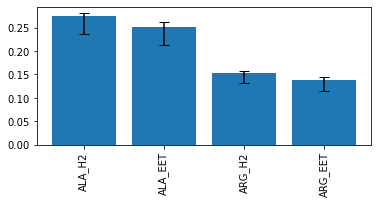

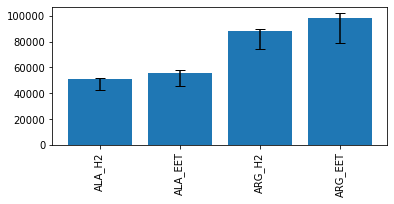

In [ ]:
from rewiredcarbon.scenario import ImportScenarioTable, CalculateScenarioEfficiencies, \
Plot_Efficiency_Bargraph, Generate_EfficienciesDict_Keys_Sorted_by_Efficiency, \
Export_Efficiency_Bargraph
from rewiredcarbon.utils import ensure_dir

scenarioTableFileName = 'input/efficiency.csv'
outputFilenameFuelMassEff = \
'output/output_summary.csv'

ensure_dir(outputFilenameFuelMassEff)


scenarioDict = ImportScenarioTable(scenarioTableFileName)

efficienciesDict = CalculateScenarioEfficiencies(scenarioDict)

keysArray = list(efficienciesDict.keys())

Plot_Efficiency_Bargraph(efficienciesDict, 'effTotalElectricalToFuel', \
'effTotalElectricalToFuel_lowerError', 'effTotalElectricalToFuel_upperError', keysToPlot=keysArray)

Plot_Efficiency_Bargraph(efficienciesDict, 'effTotalElectricalFuelMassEfficiency', \
'effTotalElectricalFuelMassEfficiency_lowerError', \
'effTotalElectricalFuelMassEfficiency_upperError', keysToPlot=keysArray)

Export_Efficiency_Bargraph(outputFilenameFuelMassEff, efficienciesDict, scenarioDict, \
'effTotalElectricalFuelMassEfficiency', 'effTotalElectricalFuelMassEfficiency_lowerError', \
'effTotalElectricalFuelMassEfficiency_upperError', keysToPlot=keysArray)


You should expect two bar plots, first one for efficiency calculation taking into account the energy density, and the second one without that consideration. If you don't have energy density for all your targets, don't care for the first plot.

In [ ]:
import os, glob
print("Output dir:", os.path.abspath("output"))
print("Files:", glob.glob("output/*"))

!zip -r hw8_outputs.zip output
from google.colab import files
files.download("hw8_outputs.zip")
